In [49]:
# 딥러닝......
# 파이토치, 텐서플로, 케라스
# 영상분류를 할때는.. ImageNet이라는 데이터베이스....
# ILSVRC대회 - 이미지 분류대회  RestNet이 우승... 2015
# 대표적인 딥러닝 소프트웨어
# 텐서플로 : 기업
# 파이토치 : 대학


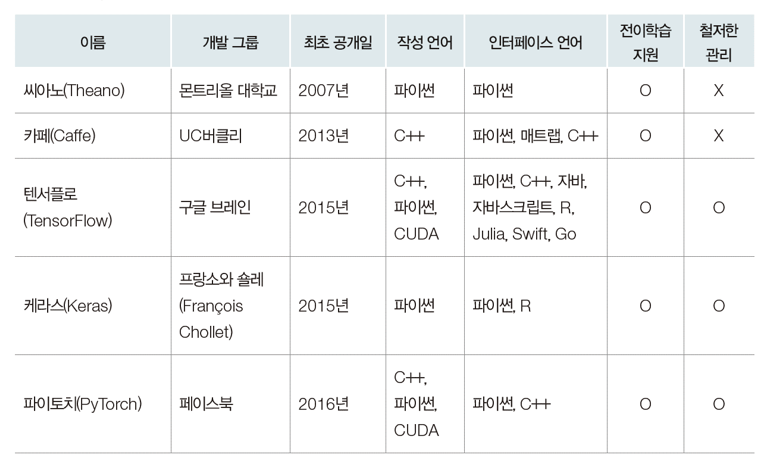

In [50]:
# https://en.wikipedia.org/wiki/Comparison_of_deep_learning_software
from IPython.display import Image
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/32.PNG", width=500)

In [51]:
# 다차원 배열을 텐서
# 데이터를 텐서
# 신경망의 가중치(매개변수)를 텐서로 표현
# 특징 벡터의 차원과 텐서의 차원을 구별
# iris에서 샘플 하나 == (꽃받침의 길이,너비,꽃잎의 길이,너비) --> 특징 벡터  4차원
# 1차원 구조의 텐서 -> 1차원 텐서

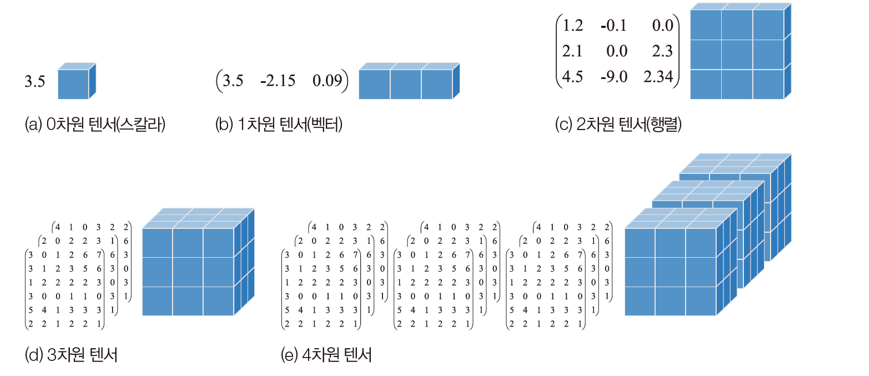

In [52]:
# 0 ~ 4차원 구조의 텐서
# 1차원 : iris 샘플 하나
# 2차원 : iris 샘플 여러개, 명암 영상 한장
# 3차원 : 명암 영상 여러장, 컬러 영상 한장
# 4차원 : 컬러영상 여러개, 컬러 동영상 하나
# 5차원 : 컬러 동영상 여러개
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/33.PNG", width=500)

In [53]:
import tensorflow as tf
import tensorflow.keras.datasets as ds

In [54]:
# 텐서플로우가 제공하는 데이터 셋 알아보기
# MNIST, cifar10, Boston housing, Reuters

In [55]:
# Mnist
(x_train,y_train),(x_target,y_target) = ds.mnist.load_data()
yy_train =  tf.one_hot(y_train,10,dtype=tf.int8)
print("MNIST:",x_train.shape, y_train.shape, yy_train.shape)

MNIST: (60000, 28, 28) (60000,) (60000, 10)


In [56]:
# Mnist
# (x_train,y_train),(x_target,y_target) = ds.cifar10.load_data()
(x_train, y_train),(x_target, y_target) = ds.cifar10.load_data()

yy_train =  tf.one_hot(y_train,10,dtype=tf.int8)
print("MNIST:",x_train.shape, y_train.shape, yy_train.shape)

MNIST: (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)


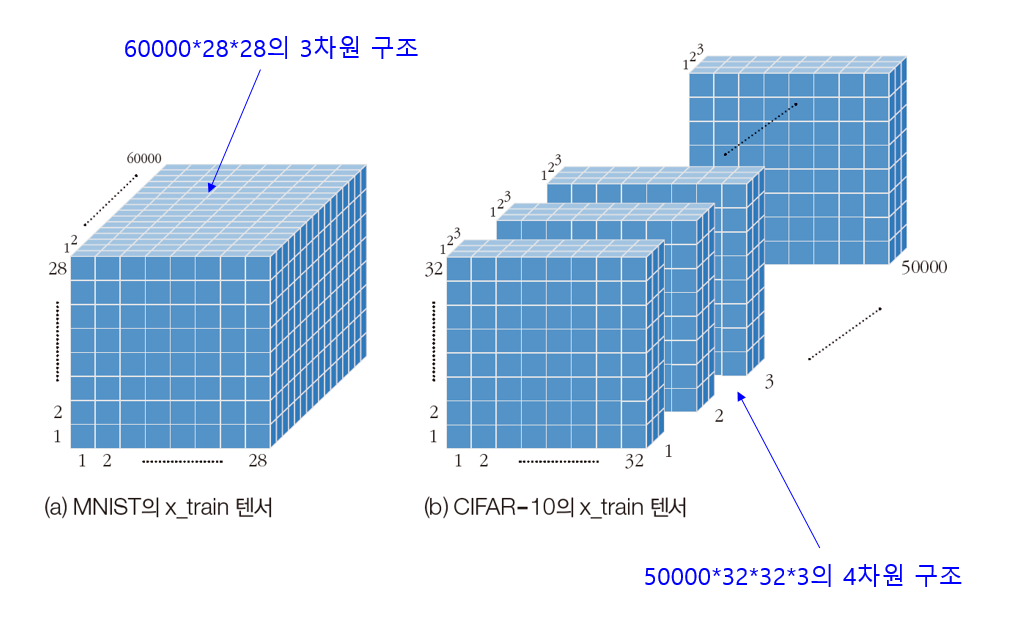

In [57]:
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/34.PNG", width=500)

In [58]:
# 사이킷런 라이브러리로는 딥러닝 구현이 어려워서 텐서플로(파이토치)로 갈아탐...

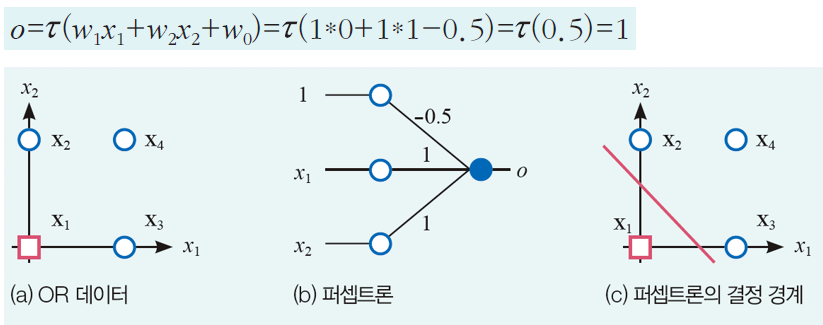

In [59]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/01.PNG", width=500)

In [60]:
import tensorflow as tf
# 퍼셉트론의 동작을 구현
#  OR 데이터 구축
x = [[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y = [[-1],[1],[1],[1]]

# (b)퍼셉트론
w = tf.Variable([[1.0],[1.0]])
b = tf.Variable(-0.5)

s = tf.add(tf.matmul(x,w),b)
o = tf.sign(s)

o


<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-1.],
       [ 1.],
       [ 1.],
       [ 1.]], dtype=float32)>

In [61]:
# 프로그램 1
# 퍼셉트론 학습
#  OR 데이터 구축
x = [[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y = [[-1],[1],[1],[1]]

# 가중치 초기화
w = tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
b = tf.Variable(tf.zeros([1]))

#옵티마이저
opt = tf.keras.optimizers.Adam(learning_rate=0.1)

# 전방 계산식
def forward():
    s= tf.add(tf.matmul(x,w),b)
    o =tf.tanh(s)
    return o

# 손실함수
def loss():
    o = forward()
    return tf.reduce_mean((y-o)**2)

# 500세대까지 학습(100세대마다 학습 정보 출력)
for i in range(500):
    opt.minimize(loss,var_list=[w,b])
    if(i%100 == 0):
        print(f"loss at epoch{i} = {loss().numpy()}")

# 학습된 페셉트론으로 OR 데이터를 예측
o = forward()
print(o)

loss at epoch0 = 0.9726105332374573
loss at epoch100 = 0.012831551022827625
loss at epoch200 = 0.004840823356062174
loss at epoch300 = 0.0026594812516123056
loss at epoch400 = 0.00171833171043545
tf.Tensor(
[[-0.94709706]
 [ 0.9643905 ]
 [ 0.9714643 ]
 [ 0.99998575]], shape=(4, 1), dtype=float32)


In [62]:
# 프로그램 1 에서 사용한 명령어들의 예시

In [63]:
x = tf.constant([[1.,3.],[2.,6.]])
print(x)
print(tf.reduce_mean(x))
print(tf.reduce_mean(x,0))  # 열단위
print(tf.reduce_mean(x,1)) # 행단위

tf.Tensor(
[[1. 3.]
 [2. 6.]], shape=(2, 2), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor([1.5 4.5], shape=(2,), dtype=float32)
tf.Tensor([2. 4.], shape=(2,), dtype=float32)


In [64]:
# -0.5 ~ 0.5 사이의 중복되지 않은 임의의 데이터를 2,1 shape 형태로 랜덤하게 출력
tf.random.uniform([2,1],-0.5,0.5)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-0.34782434],
       [ 0.1977601 ]], dtype=float32)>

In [65]:
tf.zeros([1])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

In [66]:
# 프로그램1의 문제점
# 날코딩..... 손코딩...
# 케라스가 이런 수고를 덜어줌
# 프로그램의 추상화
# 케라스는 이 추상화를 활용한 라이브러를 제공 
# 코딩방식이 model.add(Dense(.. ...))
# 케라스 keras.io 공식 사이트의 케라스 철학
# 아이디어를 빠르게 결과로 연결하는 능력이 훌륭한 연구의 핵심 - 사람을위해 설계된 API

In [67]:
# keras의 중요 하위 클래스
# model 클래스 : 함수형태의 api 모델 제작 방식
# layer 클래스 : 다양한 종류의 층
# optimizers 클래스 : 최적화에 필요한 함수

In [68]:
# 프로그램 2
# 퍼셉트론 학습
from tensorflow.keras.models import Sequential  # 층을 한줄로 쌓는데 사용
from tensorflow.keras.layers import Dense       # 완전 연결층
from tensorflow.keras.optimizers import SGD     # 기본 옵티마이져

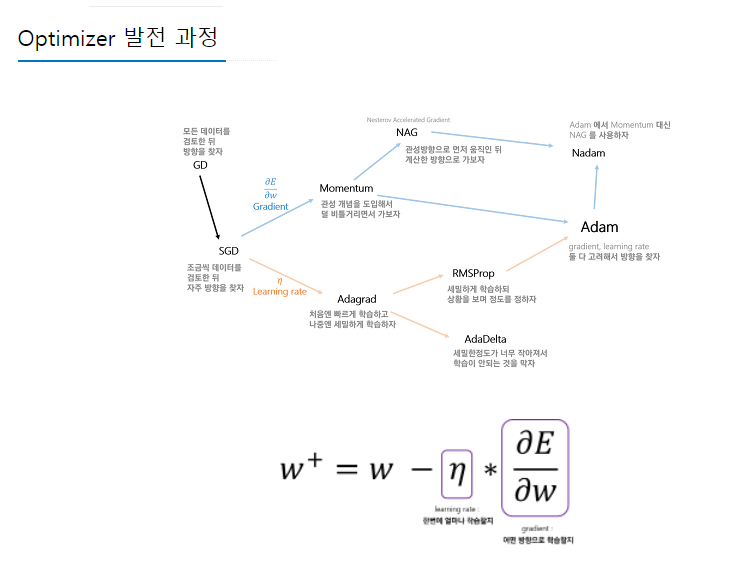

In [69]:
# 옵티마이져의 종류
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/35.PNG", width=600)

In [70]:
# 케라스프로그래밍 절차
# 데이터구축 -> 신경망 구조 설계 -> 학습 -> 예측
# OR 데이터 구축
x = [[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y = [[-1],[1],[1],[1]]

# 신경망 구조 설계
n_input = 2
n_output = 1

perceptron = Sequential() # 객체생성
perceptron.add(Dense(units=n_output,activation='tanh',input_shape=(n_input,),
                     kernel_initializer='random_uniform', bias_initializer='zeros'))

# 신경망 학습
perceptron.compile(loss='mse', optimizer=SGD(learning_rate=0.1), metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

# 학습된 신경망을 예측
res = perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 0s - loss: 1.0473 - mse: 1.0473 - 182ms/epoch - 182ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7764 - mse: 0.7764 - 3ms/epoch - 3ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6560 - mse: 0.6560 - 3ms/epoch - 3ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5982 - mse: 0.5982 - 3ms/epoch - 3ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5641 - mse: 0.5641 - 3ms/epoch - 3ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5399 - mse: 0.5399 - 3ms/epoch - 3ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5207 - mse: 0.5207 - 2ms/epoch - 2ms/step
Epoch 8/500
1/1 - 0s - loss: 0.5040 - mse: 0.5040 - 3ms/epoch - 3ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4890 - mse: 0.4890 - 4ms/epoch - 4ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4750 - mse: 0.4750 - 2ms/epoch - 2ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4617 - mse: 0.4617 - 3ms/epoch - 3ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4490 - mse: 0.4490 - 2ms/epoch - 2ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4367 - mse: 0.4367 - 2ms/epoch - 2ms/step
Epoch 14/500
1/1 - 0s - loss: 0.4250 - mse:

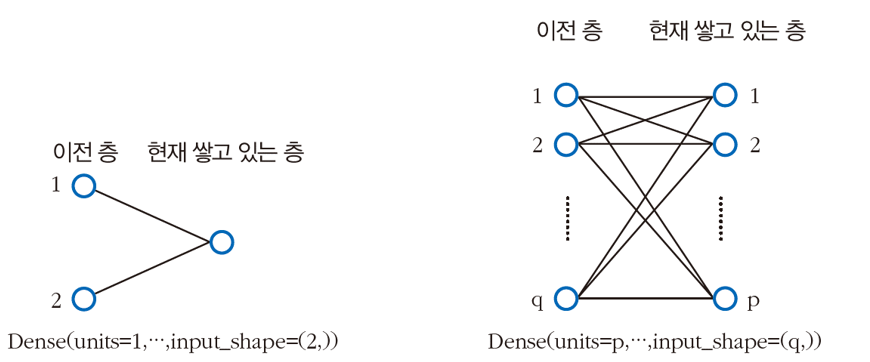

In [71]:
# Dense로 완전연결층을 쌓는 방식
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/36.PNG", width=600)

In [72]:
# MNIST vs fashion MNIST 데이터를 다층 퍼셉트론으로 인식하는 실습

In [73]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [74]:
# mnist에서 데이터를 읽어와서 신경망에 입력할 형태로 변환
(x_train,y_train),(x_target,y_target) = mnist.load_data()
x_train.shape,x_target.shape

((60000, 28, 28), (10000, 28, 28))

In [75]:
# 딥러닝의 신경망에 적용하려면 2차원 또는 그 이하...
# reshape 함수로 2차원 구조의 텐서를 1차원 구조로 변환
x_train = x_train.reshape(-1,28*28)
x_target = x_target.reshape(-1,28*28)
x_train.shape, x_target.shape

((60000, 784), (10000, 784))

In [76]:
# 정규화... 
np.array(range(10))/ 10.0

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [77]:
np.unique(x_train[0])/255.0

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.03529412,
       0.04313725, 0.05490196, 0.0627451 , 0.07058824, 0.09019608,
       0.09411765, 0.09803922, 0.10196078, 0.10588235, 0.11764706,
       0.1372549 , 0.14117647, 0.15294118, 0.16862745, 0.17647059,
       0.18039216, 0.19215686, 0.21568627, 0.21960784, 0.25098039,
       0.25882353, 0.2745098 , 0.30588235, 0.31372549, 0.31764706,
       0.32156863, 0.35294118, 0.36470588, 0.36862745, 0.41960784,
       0.42352941, 0.44705882, 0.46666667, 0.49411765, 0.49803922,
       0.50980392, 0.51764706, 0.52156863, 0.52941176, 0.53333333,
       0.54509804, 0.58039216, 0.58823529, 0.60392157, 0.61176471,
       0.62745098, 0.65098039, 0.66666667, 0.67058824, 0.6745098 ,
       0.68627451, 0.71372549, 0.71764706, 0.72941176, 0.73333333,
       0.74509804, 0.76470588, 0.77647059, 0.78823529, 0.80392157,
       0.81176471, 0.83137255, 0.83529412, 0.85882353, 0.86666667,
       0.88235294, 0.88627451, 0.89803922, 0.93333333, 0.94117

In [78]:
# 정규화 : 데이터의 범위를 알고있으면 수동으로 정규화 해도 됨
(x_train/255.0)[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [79]:
x_train = x_train / 255.0
x_target = x_target / 255.0

In [80]:
# 정답데이터 0 /1  이진 아니고 다중일때.
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [81]:
# 레이블 원핫으로 인코딩
np.unique( y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [82]:
y_train =  tf.keras.utils.to_categorical(y_train,10)
y_target =  tf.keras.utils.to_categorical(y_target,10)
y_train.shape

(60000, 10)

In [94]:
# 다층 퍼셉트론 == 심층신경망
# 입력,히든, 출력
# 신경망 구조를 설계
n_input    = 28*28
n_hidden   = 1024
n_output = 10
mlp = Sequential()
mlp.add(Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),
              kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',
              kernel_initializer='random_uniform',bias_initializer='zeros'))

In [95]:
# 신경망 학습
mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
# 학습결과를 저장하는 이유는 시각화에 이용하려고
hist = mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_target,y_target),verbose=2)

Epoch 1/30
469/469 - 4s - loss: 0.0423 - accuracy: 0.8461 - val_loss: 0.0269 - val_accuracy: 0.9097 - 4s/epoch - 8ms/step
Epoch 2/30
469/469 - 3s - loss: 0.0222 - accuracy: 0.9288 - val_loss: 0.0184 - val_accuracy: 0.9425 - 3s/epoch - 7ms/step
Epoch 3/30
469/469 - 3s - loss: 0.0163 - accuracy: 0.9487 - val_loss: 0.0144 - val_accuracy: 0.9526 - 3s/epoch - 7ms/step
Epoch 4/30
469/469 - 3s - loss: 0.0137 - accuracy: 0.9580 - val_loss: 0.0130 - val_accuracy: 0.9583 - 3s/epoch - 7ms/step
Epoch 5/30
469/469 - 3s - loss: 0.0120 - accuracy: 0.9636 - val_loss: 0.0115 - val_accuracy: 0.9631 - 3s/epoch - 7ms/step
Epoch 6/30
469/469 - 3s - loss: 0.0109 - accuracy: 0.9685 - val_loss: 0.0107 - val_accuracy: 0.9658 - 3s/epoch - 6ms/step
Epoch 7/30
469/469 - 3s - loss: 0.0100 - accuracy: 0.9712 - val_loss: 0.0100 - val_accuracy: 0.9680 - 3s/epoch - 6ms/step
Epoch 8/30
469/469 - 3s - loss: 0.0094 - accuracy: 0.9735 - val_loss: 0.0102 - val_accuracy: 0.9688 - 3s/epoch - 6ms/step
Epoch 9/30
469/469 - 3s 

In [96]:
# 신경망 예측
res = mlp.evaluate(x_target,y_target,verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0073 - accuracy: 0.9759


In [101]:
print(f"정확률 : {round(res[1]*100,3)}")

정확률 : 97.59


In [109]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

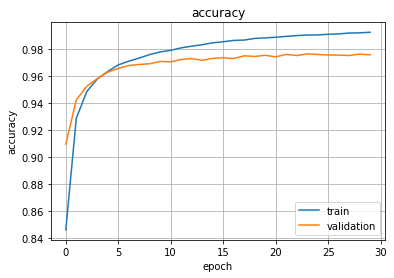

In [114]:
import matplotlib.pyplot as plt
# hist 객체를 이용해서 학습곡선
# 다층 퍼셉트론, 심층 신경망의 시각화
# 정확률 곡선
# 손실 함수 곡선


# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("accuracy")
plt.ylabel('accuracy')
plt.xlabel("epoch")
plt.legend(['train','validation'],loc = 'best')
plt.grid()
plt.show()
